# [실습-퀴즈] Python 활용한 AI 모델링 - 전처리 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 전처리에 대해 실습해 보겠습니다.
+ 머신러닝과 AI 모델링 전체에서 60~90% 차지하는 부분이 바로 전처리 파트입니다.
+ 굉장히 시간과 노력이 많이 투입되며, 어려운 부분일수 있습니다.
+ 데이터가 깨끗이 정리되지 않는다면 머신러닝/AI 성능을 장담할수 없으므로 데이터 전처리에 심혈을 기울려 주시기 바랍니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
0. 실습 내용 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 불필요 컬럼 삭제
 - 컬럼 내용 변경하기
 - Null 처리
 - 컬럼 type 변경하기
4. 시각화
5. 결과 저장하기

##  
# 0. 실습 내용 확인

## <font color=White> **머신러닝, 딥러닝을 사용한 통신 서비스 이탈 예측** </font>
### 모든 관련 고객 데이터를 분석하고 강력하고 정확한 이탈 예측 모델을 개발하여 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 수립합니다.
### Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미합니다. 모든 조직이 기존 고객을 유지하고 새로운 고객을 유치하는 것이 매우 중요합니다. 그 중 하나가 실패하면 비즈니스에 좋지 않습니다. 목표는 업계에서 경쟁 우위를 유지하기 위해 이탈 예측을 위한 머신러닝, 딥러닝의 가능성을 탐색하는 것입니다.

#  
# 1. 필요 라이브러리 임포트 및 파일 읽어오기

### Numpy

##### <font color=blue> **[문제] numpy 라이브러리를 np alias로 임포트하세요.** </font>

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

####  
### Pandas

##### <font color=blue> **[문제] pandas 라이브러리를 pd alias로 임포트하세요.** </font>

In [2]:
import pandas as pd

####  
### <font color=green>읽어올 데이터 파일 : data_v1.csv</font>

#### Telco Customer Churn Dataset  컬럼
1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

In [ ]:

import os

os.listdir('.')

['.DS_Store', 'README.md', '예제1.전처리_퀴즈정답포함.ipynb', '.git', 'data_v1_save.csv']

####  
### CSV 파일 데이터 읽어오기

##### <font color=blue> **[문제] data_v1.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [4]:
# 읽어 들일 파일명 : data_v1.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장

df = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#  
# 2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석

### 데이터 탐색하기

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


####  
### 자료구조 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 데이터 타입, 인덱스, 컬럼명, Values 확인

In [ ]:
# 인덱스
df.index

RangeIndex(start=0, stop=7043, step=1)

In [ ]:
# 컬럼명
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Values
df.values

array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

####  
### Null 데이터 확인

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####  
### 통계 정보

In [ ]:
# SeniorCitizen 컬럼 : 고령자 여부, 범주형 0,1
# tenure : 서비스 사용한 월수로 평균 32개월 사용, 최대 72개월 충성고객 있음 확인
#           25%, 50%, 75% 비율과 Max를 보니, 아무래도 Outliner 있는것으로 사료됨.
# MonthlyCharges : 월사용요금, 평균 64$ , 최소 18$, 최대 118$

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#  
# 3. 데이터 전처리 수행

####  
### 자료구조 파악

##### <font color=blue> **[문제] df DataFrame의 함수를 활용해서 자료구조(Row, columnm , Not-null, type)을 파악 하세요.** </font>

In [ ]:
# DataFrame info 함수 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 컬럼 삭제

##### <font color=blue> **[문제] df 데이터프레임에서 'customerID' 컬럼 삭제 하세요.** </font>

In [ ]:
# DataFrame drop 함수 
# 'customerID' 컬럼 삭제
# axis=1 옵션 사용해서 컬럼단위 삭제 수행
# inplace=True 옵션 사용하여 df DataFrame에 저장
df.drop(labels='customerID', axis=1, inplace=True)

In [ ]:
# 21컬럼에서 20개 컬럼으로 1개 줄어듬 확인
# TotalCharges 컬럼은 사용요금으로 숫자형이어야 하는데 Ojbect로 나옴. 확인 필요

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


####  
### 컬럼 내용 변경하기 

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환하로록 하자.<br>
null, _ 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경하거나 필요없을 경우 삭제하도록 하자.

#### TotalCharges 컬럼 타입 변경하기

In [ ]:
# TotalCharges : 월사용요금, 실수형으로 보인다.
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
# 1) 공백 문자열을 NaN으로 대체
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# 2) float로 변환
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
# Boolean indexing으로 검색
# astype으로 변경시 변경이 되지 않는 문제는 문자열이 공백인 경우
(df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# Boolean indexing으로 검색
# 조건에 해당되는 행만 cond에 저장
# 문자열이 공백인 행만 출력
cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼의 ' ' 값 --> '0' 변경하세요.** </font>

In [ ]:
# gender 컬럼에 대해서만 한 번에 교체
df.replace({'gender': {'Female': '0', 'Male': '1'}}, inplace=True)

In [ ]:
# 1) DataFrame 전체에 한 번에 치환
df.replace({'TotalCharges': {' ': '0'}}, inplace=True)

# 2) Series.replace 결과를 컬럼에 다시 할당
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

# 3) to_numeric → NaN → 0으로 처리(이후 float 변환 시 더 깔끔)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)


####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼 타입을 object에서 float 변경하세요.** </font>

In [ ]:
# 'TotalCharges' 컬럼 type을 float로 변경
# 결과를 TotalCharges 컬럼에 다시 넣어야 합니다.
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
# 다시 Boolean indexing으로 검색 : '' 값을 가진 Row 없음

cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# TotalCharges 컬럼 float 변경 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Churn 컬럼의 문자열값을 숫자로 변경

In [ ]:
# Churn 컬럼의 분포 확인 
# Churn Yes : 이탈 , No : 이탈안함. 언밸런스하게 No쪽이 많은 차지하고 있음

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace=True)

/var/folders/5x/8_5m_9v57bz_btfk508ff3hc0000gn/T/ipykernel_16379/528161001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder의 객체를 생성 
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [ ]:
# Churn 컬럼의 분포 확인 
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

####  
### Null 데이터 확인

##### <font color=blue> **[문제] df 데이터프레임에 대해 컬럼별로 null 얼마나 있는지 null 갯수를 나열 하세요.** </font>

In [ ]:
# DataFrame isnull(), sum() 함수 활용
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####  
### 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

####  
##### <font color=blue> **[문제] df 데이터프레임의 결측치 많은 컬럼은 컬럼 제거하고 나머지 결측치는 Row 제거 하세요.** </font>

In [ ]:
# # 1. 결측치 많은 컬럼 :  DeviceProtection   --> drop 함수 이용하여 해당 컬럼 제거
# # 2. 결측치 작은 Row에 대해서 dropna로 제거 
# # inplace=True 옵션으로 자체 저장
# df.drop(labels='DeviceProtection', axis=1, inplace=True)
# df.dropna(axis=0, inplace=True)

In [ ]:
# Null 여부 다시 확인
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# DeviceProtection 컬럼 삭제 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#  
# 4. 시각화

### 라이브러리 임포트

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

####  
### Bar 차트

In [ ]:
df['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

<Axes: xlabel='gender'>

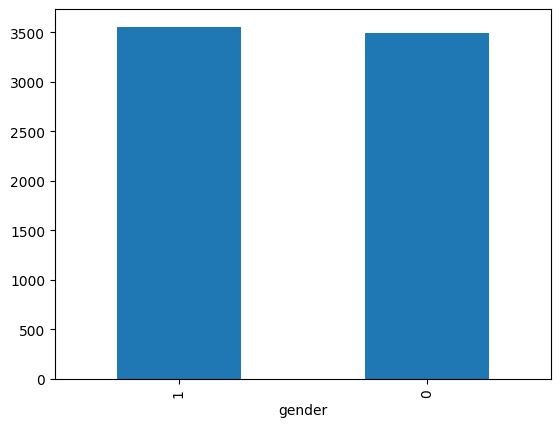

In [ ]:
df['gender'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] df 데이터프레임의 'Partner' 컬럼의 값 분포를 구하고 Bar 차트를 그리세요.** </font>

<Axes: xlabel='Partner'>

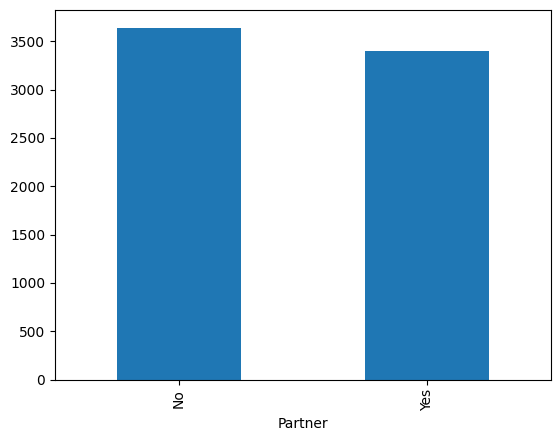

In [ ]:
# DataFrame value_counts()와 plot() 함수 활용
# 대상 컬럼 : 'Partner'  
# plot 함수의 인자 : kind='bar'
df['Partner'].value_counts().plot(kind='bar')

####  
### 한꺼번에 Object 컬럼에 대해서 분포 Bar 차트 확인해 봅시다.

In [ ]:
# Object 컬럼만 뽑으려면 
# 1. 일일히 눈으로 보고 Object 컬럼 고른다
# 2. select_dtypes() 함수 활용한다.

# select_dtypes함수는 float,int,object중에 원하는 타입의 컬럼만 선택

df.select_dtypes('O').head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,1,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
# Object 컬럼명만 뽑아보자
df.select_dtypes('O').columns.values

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

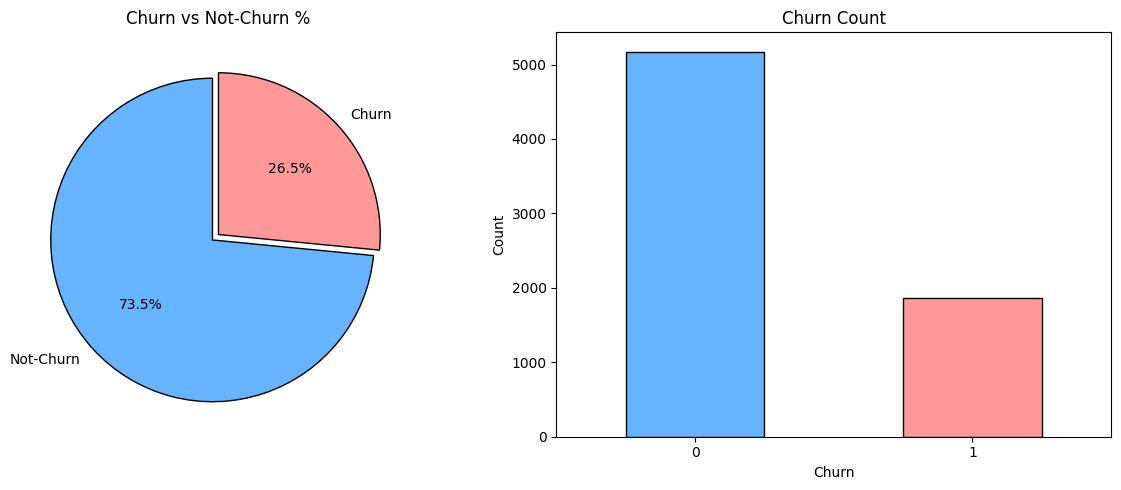

In [ ]:
import matplotlib.pyplot as plt

# 1) Churn / Not-Churn 카운트
circle = df['Churn'].value_counts()  # 예: [‘No’: 5174, ‘Yes’: 1869]

# 2) 사용할 색상 정의
colors = ['#66b3ff', '#ff9999']  # ['Not-Churn 색상', 'Churn 색상']

# 3) Pie 차트 그리기
plt.figure(figsize=(12,5))

# left: 비율 파이 차트
plt.subplot(1,2,1)
plt.pie(
    circle,
    labels=['Not-Churn', 'Churn'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0),
    colors=colors,
    wedgeprops={'edgecolor':'black', 'linewidth':1}
)
plt.title('Churn vs Not-Churn %')

# right: 바 차트
plt.subplot(1,2,2)
circle.plot(kind='bar', color=colors, edgecolor='black')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Churn Count')

plt.tight_layout()
plt.show()


In [ ]:
df1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
df2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
df3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

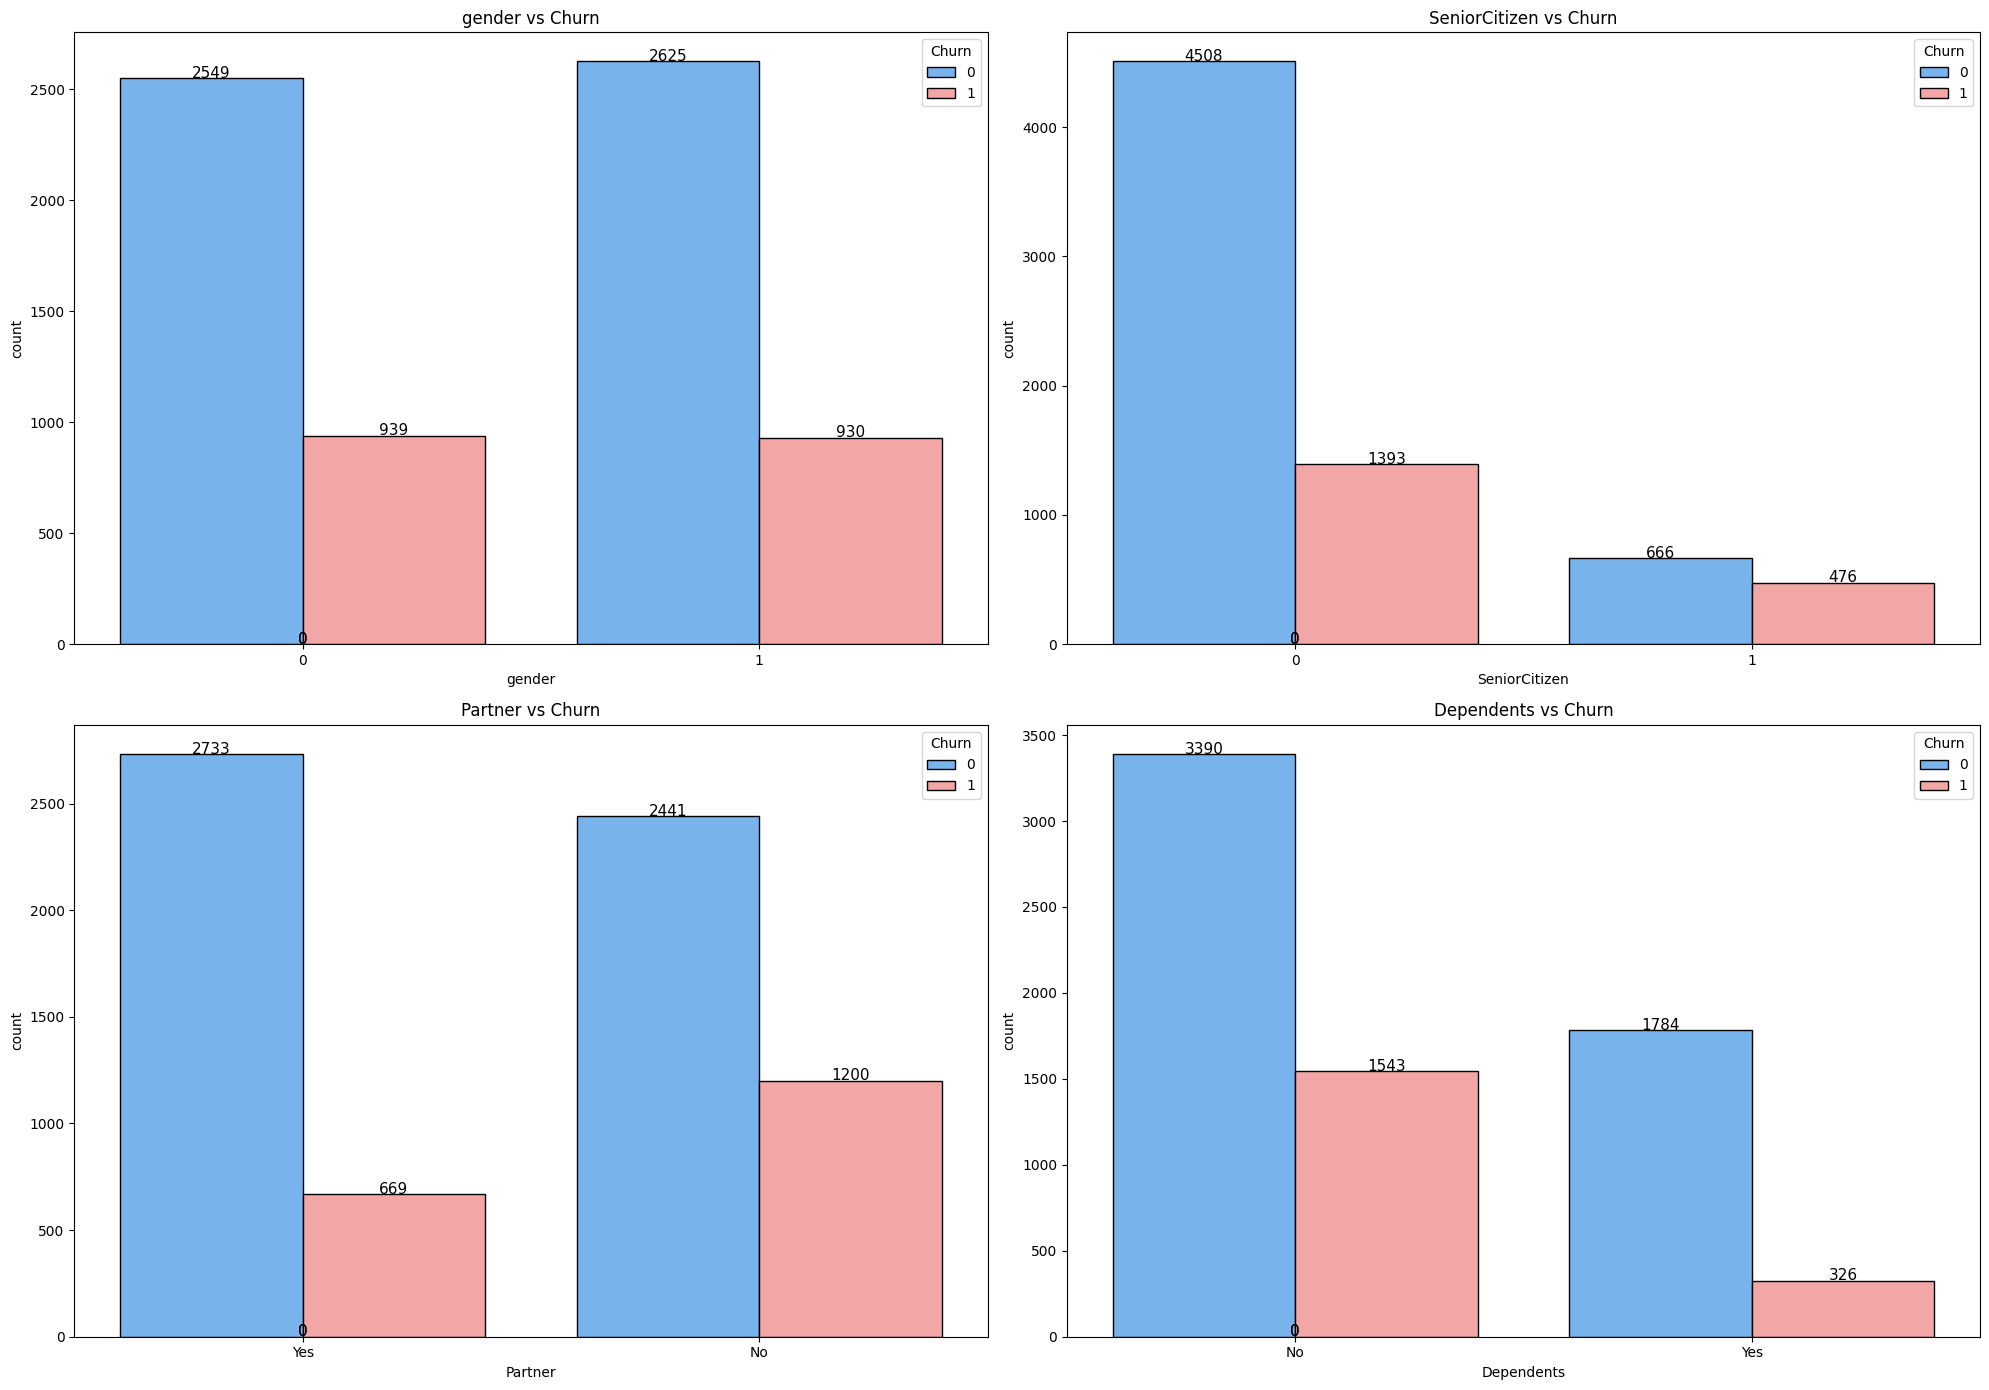

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 사용할 색상 정의 (Not-Churn, Churn)
colors = ['#66b3ff', '#ff9999']

# 2) 플롯 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
axes = axes.flatten()

for i, col in enumerate(df1):
    ax = axes[i]
    sns.countplot(
        x=col,
        data=df,
        hue="Churn",
        palette=colors,
        edgecolor='black',
        ax=ax
    )
    # 빈도값 텍스트 표시
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            int(rect.get_height()),
            ha='center',
            fontsize=11
        )
    ax.set_title(f'{col} vs Churn')
    ax.legend(title='Churn')  # 범례 제목

plt.tight_layout()
plt.show()


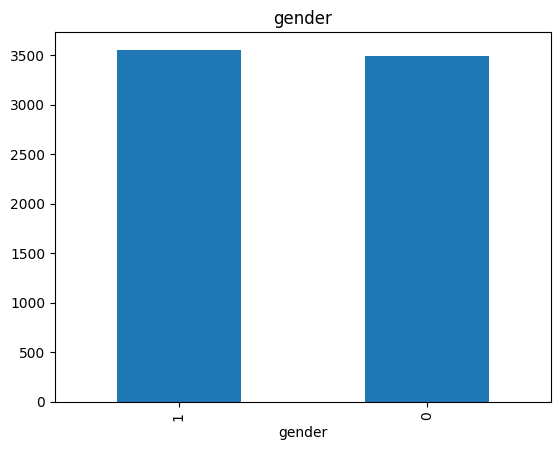

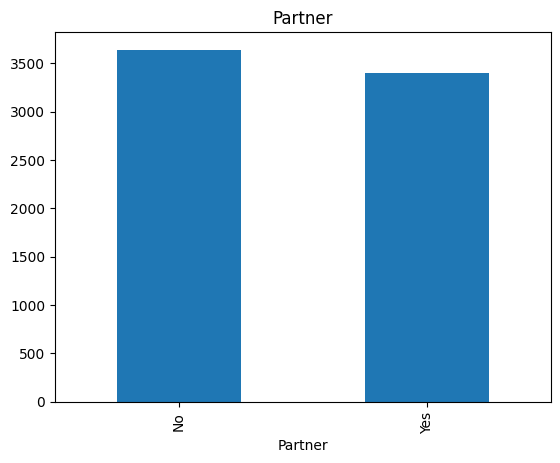

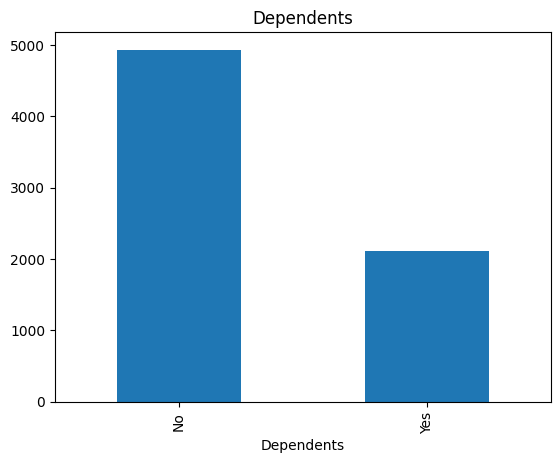

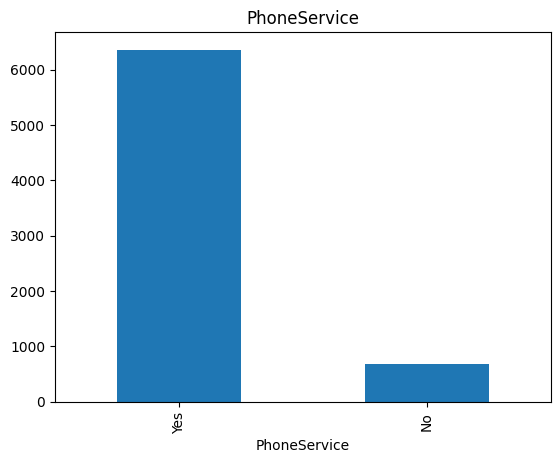

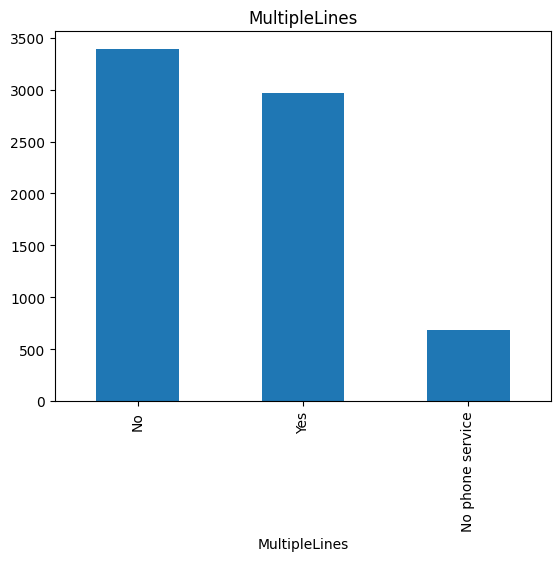

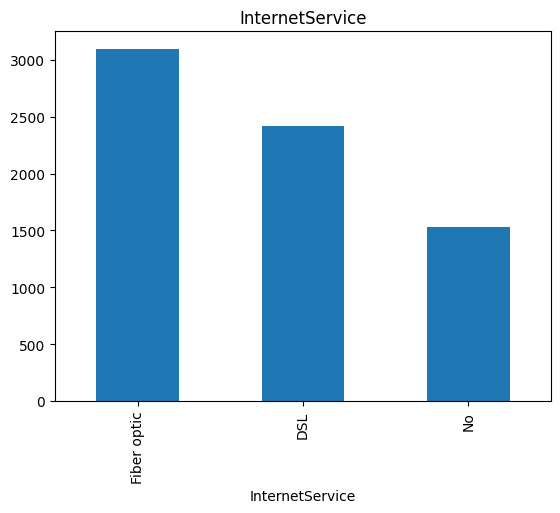

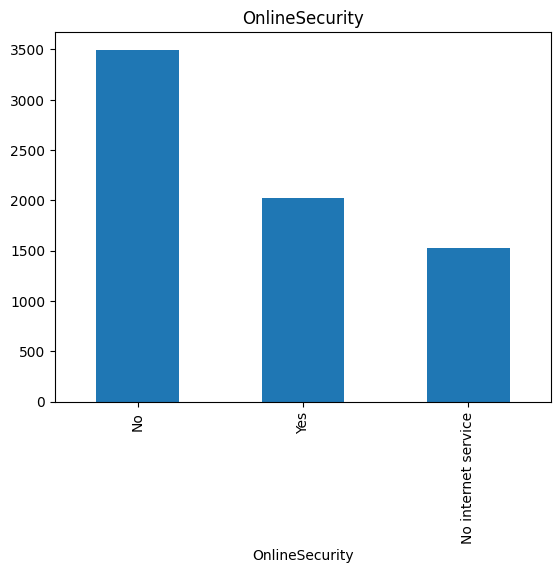

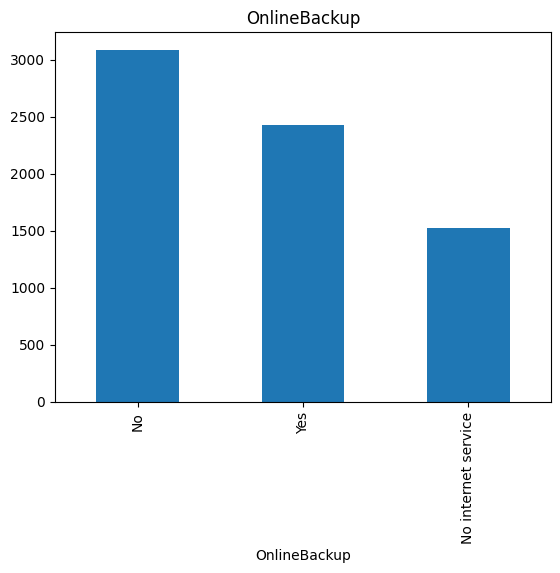

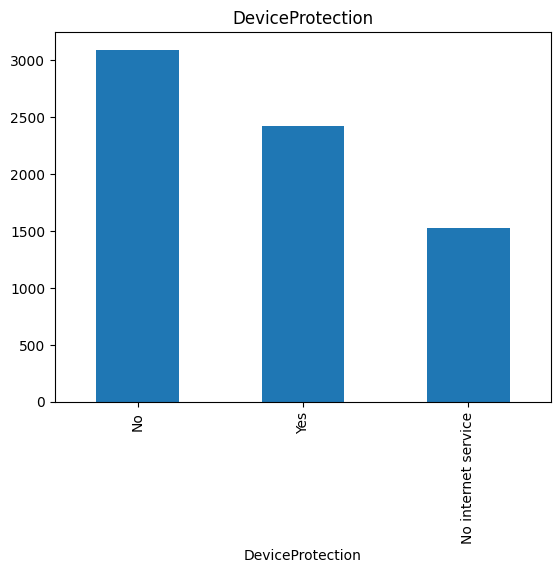

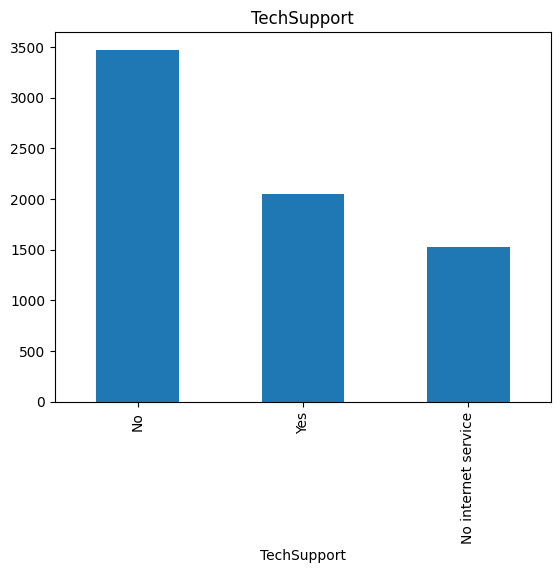

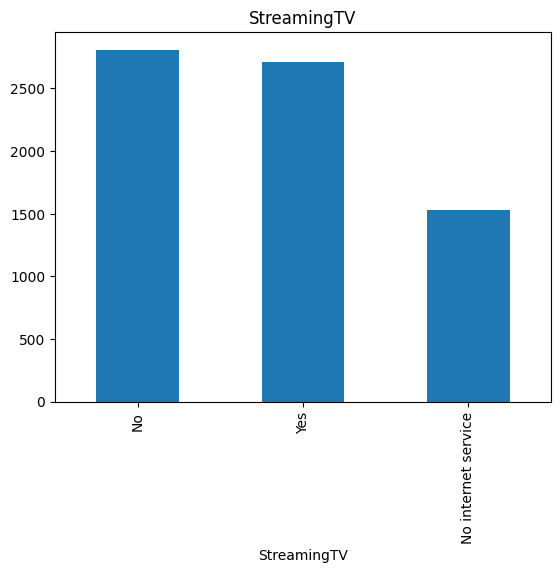

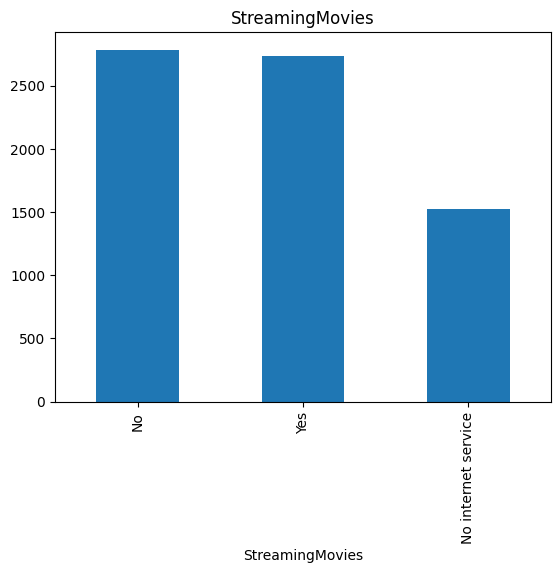

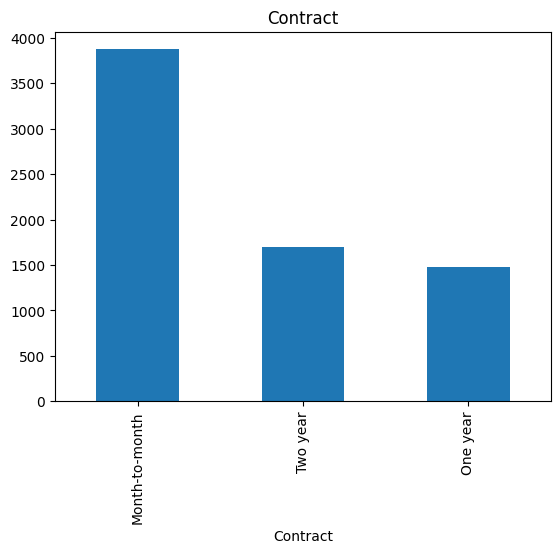

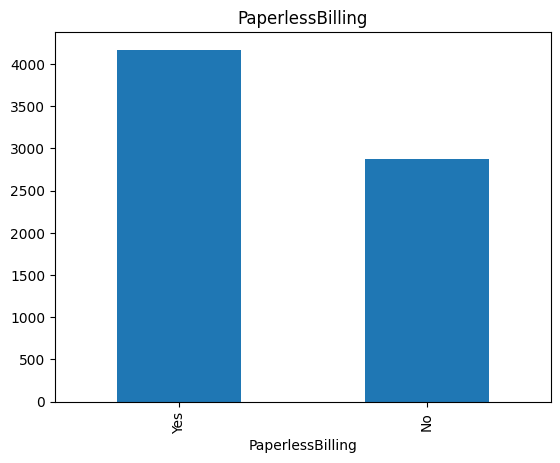

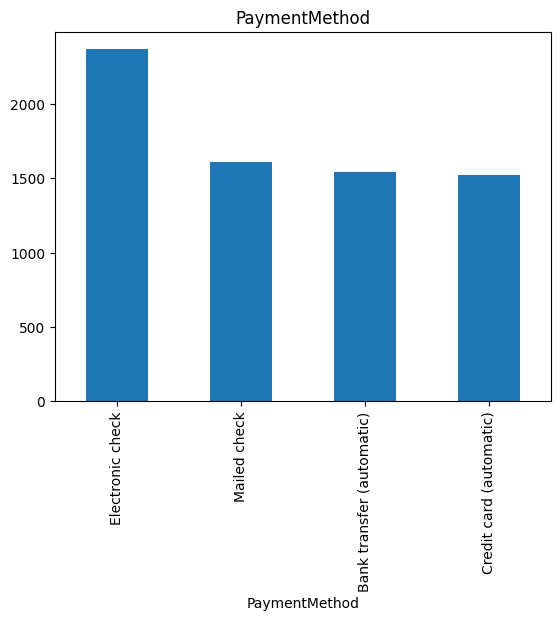

In [ ]:
# Object 컬럼 하나씩 가져와서 Bar 차트 그려보기
# 불균형 컬럼 : Dependents, PhoneService. 심한 불균형 가진 PhoneService 컬럼 삭제 필요  

object_list = df.select_dtypes('object').columns.values

for col in object_list:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

#### 불균형 심한 PhoneService 컬럼 삭제

In [ ]:
df.drop('PhoneService', axis=1, inplace=True)

####  
### 숫자형 컬럼에 대한 시각화

In [ ]:
# number(int, float) 컬럼에 대해 검색
df.select_dtypes('number').head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1


#### Churn 컬럼

In [ ]:
# Churn 컬럼은 0, 1 되어 있으므로 분포 확인
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

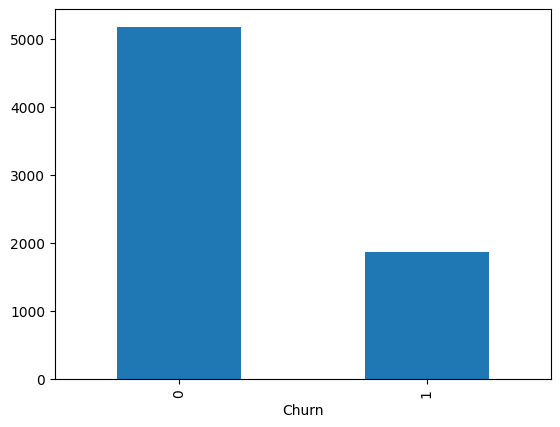

In [ ]:
# Churn 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/3 수준임 : 불균형

df['Churn'].value_counts().plot(kind='bar')

#### SeniorCitizen 컬럼

In [ ]:
# SeniorCitizen 컬럼은 0, 1 되어 있으므로 분포 확인
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen'>

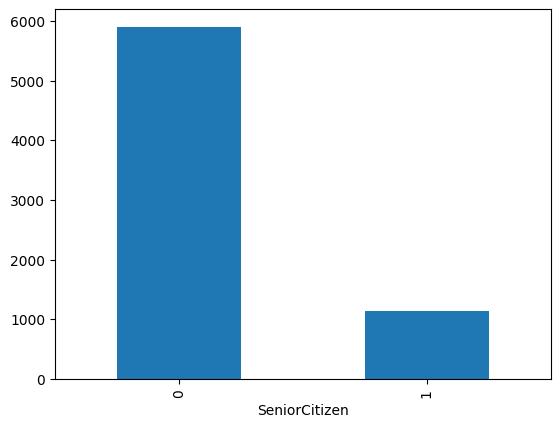

In [ ]:
# SeniorCitizen 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/5 수준임 : 불균형

df['SeniorCitizen'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] 불균형 심한 'SeniorCitizen' 컬럼을 삭제하세요.** </font>

In [ ]:
# # DataFrame drop() 함수 활용
# # 대상 컬럼 : 'SeniorCitizen'  
# # axis 와 inplace 옵션 사용
# df.drop('SeniorCitizen', axis=1, inplace=True)

In [ ]:
# SeniorCitizen 삭제 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


####  
### Histgram

In [ ]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

#### tenure 컬럼

<Axes: xlabel='tenure', ylabel='Count'>

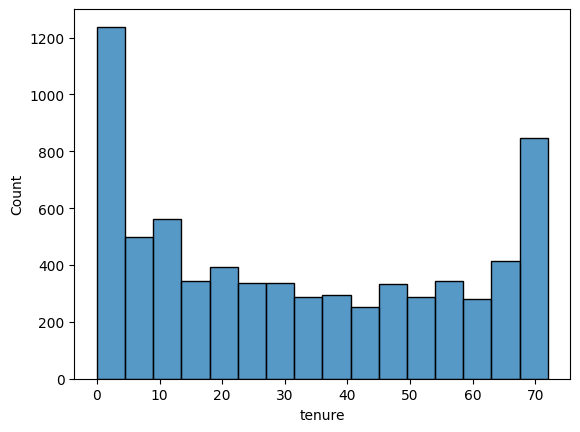

In [ ]:
# tenure (서비스 사용기간)에 대한 히스토그램
# 처음에 많이 사용하고 , 70개월 사용하는 충성고객도 있다.

sns.histplot(data=df, x='tenure')

<Axes: xlabel='tenure', ylabel='Count'>

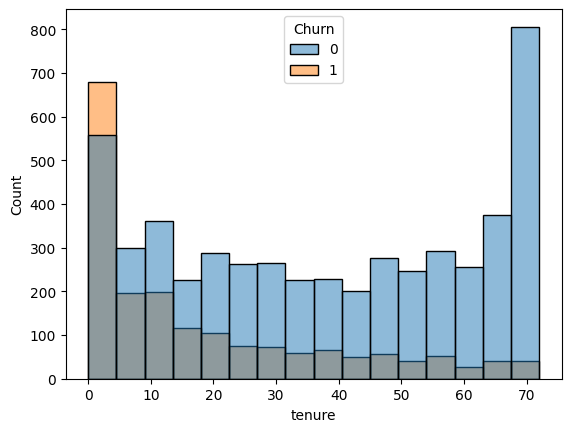

In [ ]:
# tenure (서비스 사용기간) 대한 히스토그램을 Churn 으로 구분
# 히스토그램으로 Churn 구분하니 겹쳐서 보기 어렵다.

sns.histplot(data=df, x='tenure', hue='Churn')

<Axes: xlabel='tenure', ylabel='Density'>

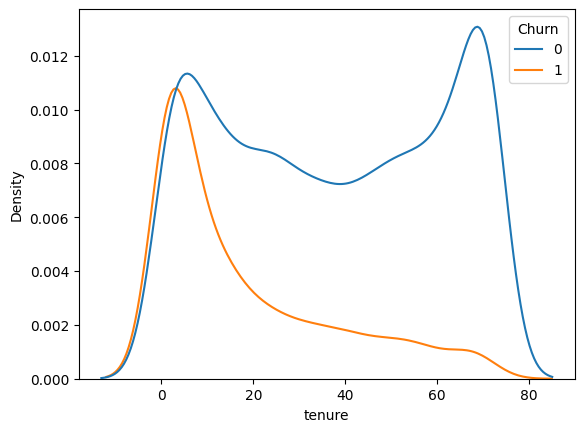

In [ ]:
# kdeplot : 히스토그램을 곡선으로 그려보자
# 처음엔 서비스 가입도 많이 하고 이탈도 많이 하는것으로 보이고
# 70개월 이상 충성고객수는 점점 줄어 들고, 특히 60개월이상 넘어가면 이탈이 많이 늘어난다.

sns.kdeplot(data=df, x='tenure', hue='Churn')

#### TotalCharges 컬럼

<Axes: xlabel='TotalCharges', ylabel='Count'>

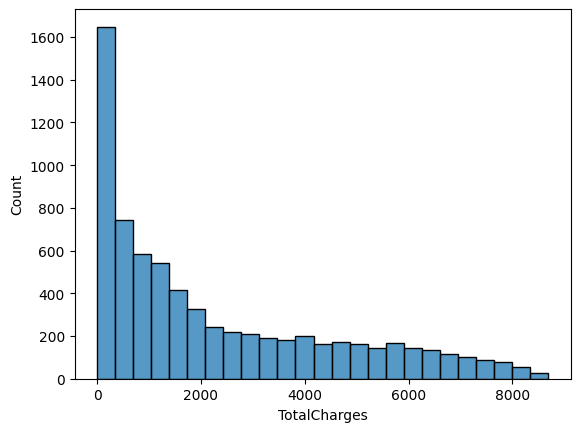

In [ ]:
# TotalCharges (서비스 총요금)에 대한 히스토그램
# 처음에 많이 사용하고 금액이 커질수록 사용자수가 줄어든다

sns.histplot(data=df, x='TotalCharges')

<Axes: xlabel='TotalCharges', ylabel='Density'>

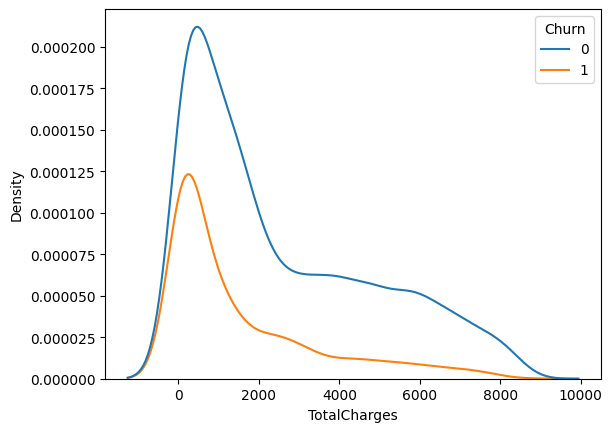

In [ ]:
# kdeplot : 히스토그램을 곡선으로 그려보자
# 최근 가입자가 이탈하기 쉽다.
# MonthlyCharges(서비스 총요금)이 클수록 이탈하기 쉽다.

sns.kdeplot(data=df, x='TotalCharges', hue='Churn')

####  
### Countplot

<Axes: xlabel='MultipleLines', ylabel='count'>

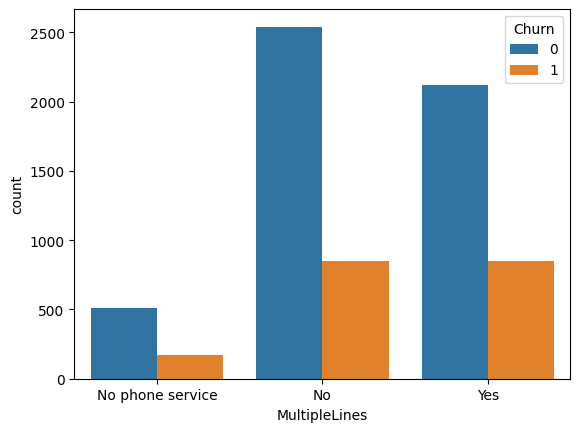

In [ ]:
# MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다.
sns.countplot(data=df, x='MultipleLines',  hue='Churn')

####  
### heatmap

In [ ]:
# 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인해 보자
df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


<Axes: >

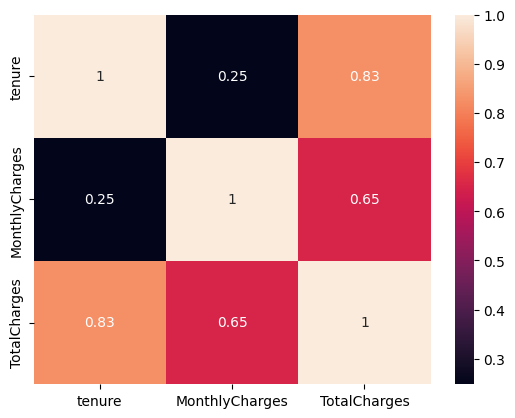

In [ ]:
# tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 heatmap으로 그려보자
# tenure(서비스 사용기간)과 TotalCharges(서비스 총요금)간의 깊은 상관관계가 있어 보인다.

sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

####  
### boxplot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

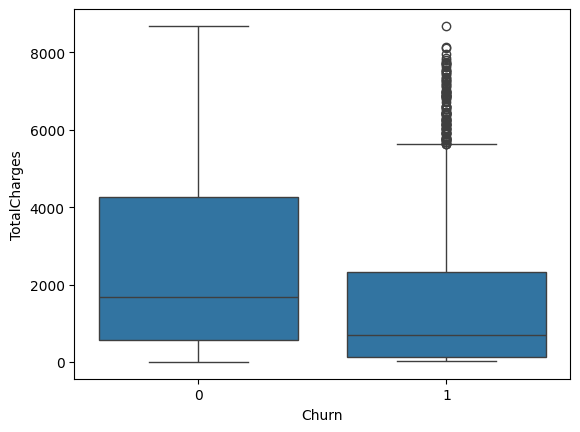

In [ ]:
# 이탈하는 고객이 이탈하지 않는 고객에 비해 총사용금액이 낮으며, Outlier 보인다.
sns.boxplot(data=df, x='Churn', y='TotalCharges')

#  
# 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [ ]:
# index=False 주어야 기존 인덱스 값이 저장되지 않음
df.to_csv('data_v1_save.csv', index=False)

In [ ]:
pd.read_csv('data_v1_save.csv').head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,1,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


##  
## 배운 내용 정리
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot 
5. 결과 저장하기
 + to_csv()